## Things to do:
1. Combine result files into a single file
2. Draw graphs

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
import pandas as pd
os.chdir('./..')

bench_run_folder = f"./runs/bench/CHASE/"
qent_run_folder = f"./runs/QENT/"

def get_final_run_file(dir_path: str):
    final_files = []
    for run_dir in os.listdir(dir_path):
        max = 0
        file = None
        for file in os.listdir(os.path.join(dir_path, run_dir)):
            run_number = int(file.split('_')[-1].split('.')[0])
            if run_number > max:
                run_file = os.path.join(os.path.join(dir_path, run_dir), file)
        final_files.append(run_file)

    return pd.concat([pd.read_csv(i) for i in final_files])

def get_common_questions(
    dfs: list[pd.DataFrame]
):

    # Find the intersection of 'question_id' across all DataFrames
    common_ids = set(dfs[0]['question_id'])
    for df in dfs[1:]:
        common_ids.intersection_update(df['question_id'])

    # Filter each DataFrame to keep only the common 'question_id's
    return [df[df['question_id'].isin(common_ids)] for df in dfs]

benchmark_results = get_final_run_file(bench_run_folder)
qent_results = get_final_run_file(qent_run_folder)

In [2]:
filtered_results = get_common_questions([benchmark_results, qent_results])
filtered_benchmark_results = filtered_results[0]
filtered_qent_results = filtered_results[1]

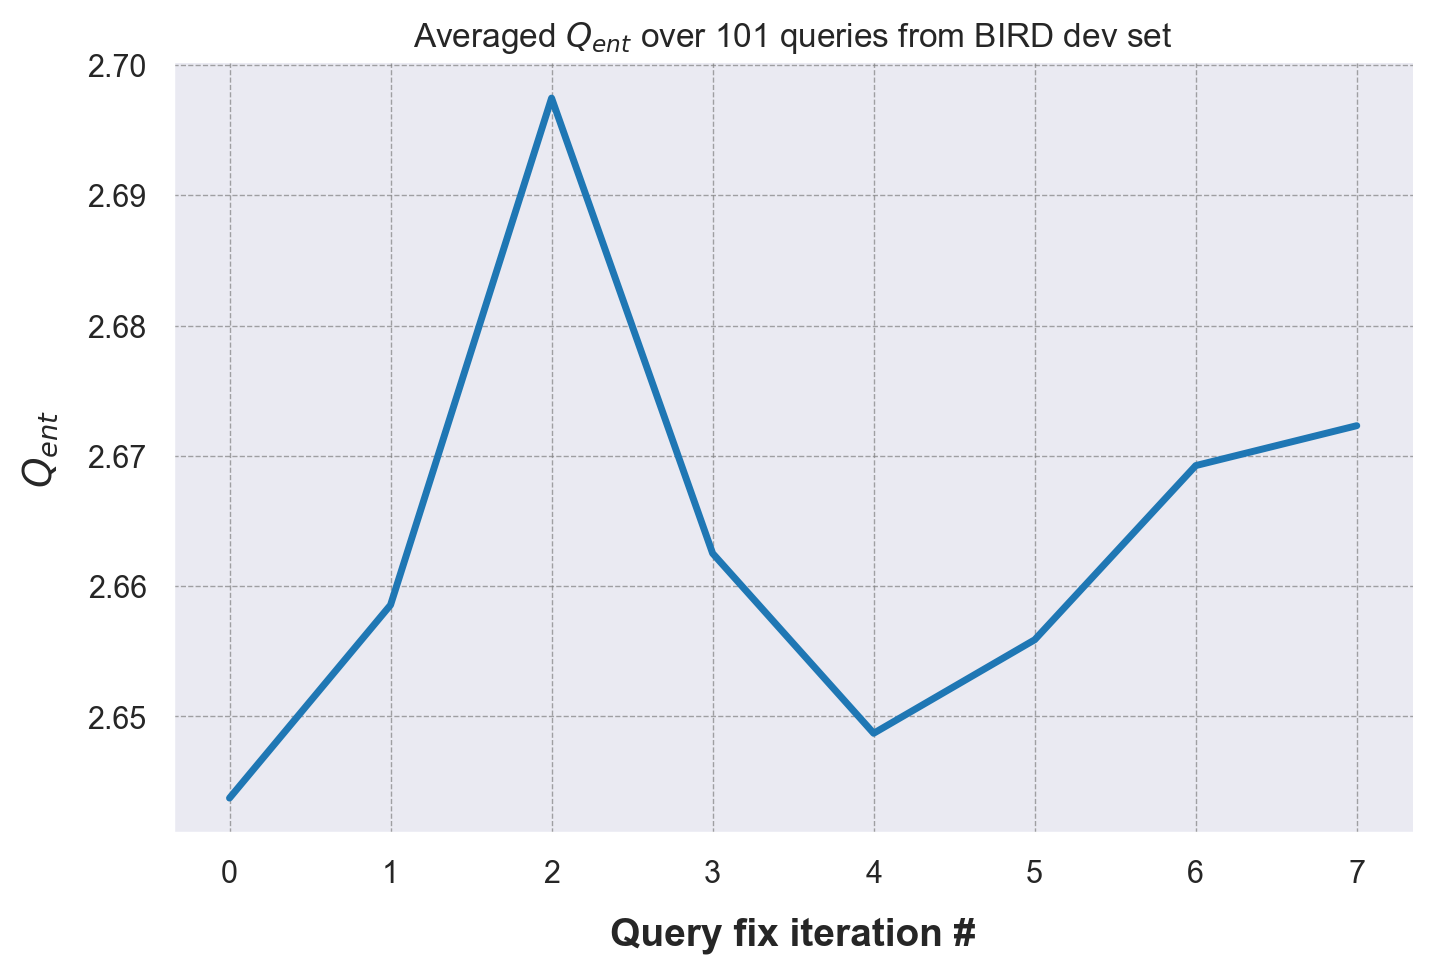

In [8]:
qents = []
for qent_result in filtered_qent_results['Query entropies during fix']:
    qents.append(ast.literal_eval(qent_result))

averaged_qents = np.mean(qents, axis=0).tolist()
std_qents = np.std(qents, axis=0)

# plt.style.use("")
sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 5), dpi=200) 

plt.plot(averaged_qents, color="#1f77b4", linewidth=2.5, linestyle='-')
plt.fill_between(range(8), averaged_qents - std_qents, averaged_qents + std_qents, color="blue", alpha=0.2, label="Std Dev")

plt.xlabel("Query fix iteration #", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('$Q_{ent}$', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Averaged $Q_{ent}$ over 101 queries from BIRD dev set')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()